# Advertising

The data is being analyzed to see how much investment in TV, radio, and newspapers increases sales figures separately.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [100]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7ECE-12C5

 Directory of C:\Users\ckili\AI_Camp\LessonNotes\Multiple Linear Regression

11/09/2024  12:30 AM    <DIR>          .
11/08/2024  09:06 PM    <DIR>          ..
11/08/2024  09:14 PM    <DIR>          .ipynb_checkpoints
11/08/2024  09:06 PM             4,063 advertising.csv
11/09/2024  12:30 AM           246,098 Advertising.ipynb
               2 File(s)        250,161 bytes
               3 Dir(s)  864,319,258,624 bytes free


In [101]:
df = pd.read_csv('advertising.csv')

### EDA

In [103]:
df.shape

(200, 4)

In [104]:
df.sample(5)

,TV,Radio,Newspaper,Sales
21,237.4,5.1,23.5,12.5
78,5.4,29.9,9.4,5.3
133,219.8,33.5,45.1,19.6
157,149.8,1.3,24.3,10.1
66,31.5,24.6,2.2,9.5


In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [106]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [108]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Data Visualization

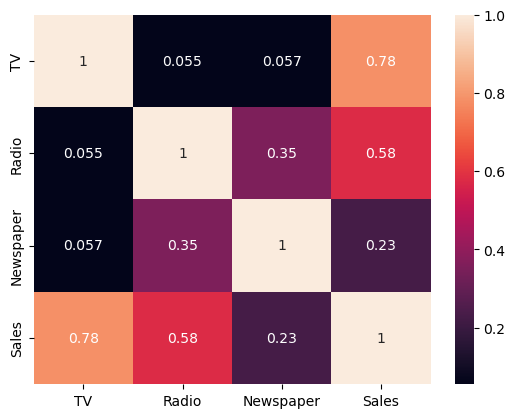

In [110]:
sns.heatmap(df.corr(),annot=True);

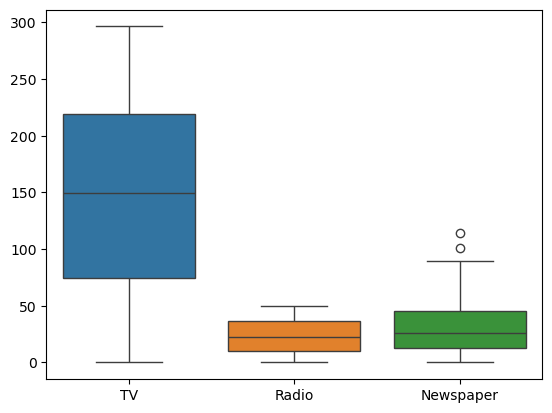

In [111]:
sns.boxplot([df['TV'],df['Radio'],df['Newspaper']]);

### Modelling

In [113]:
# Define the features and target variable
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [114]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

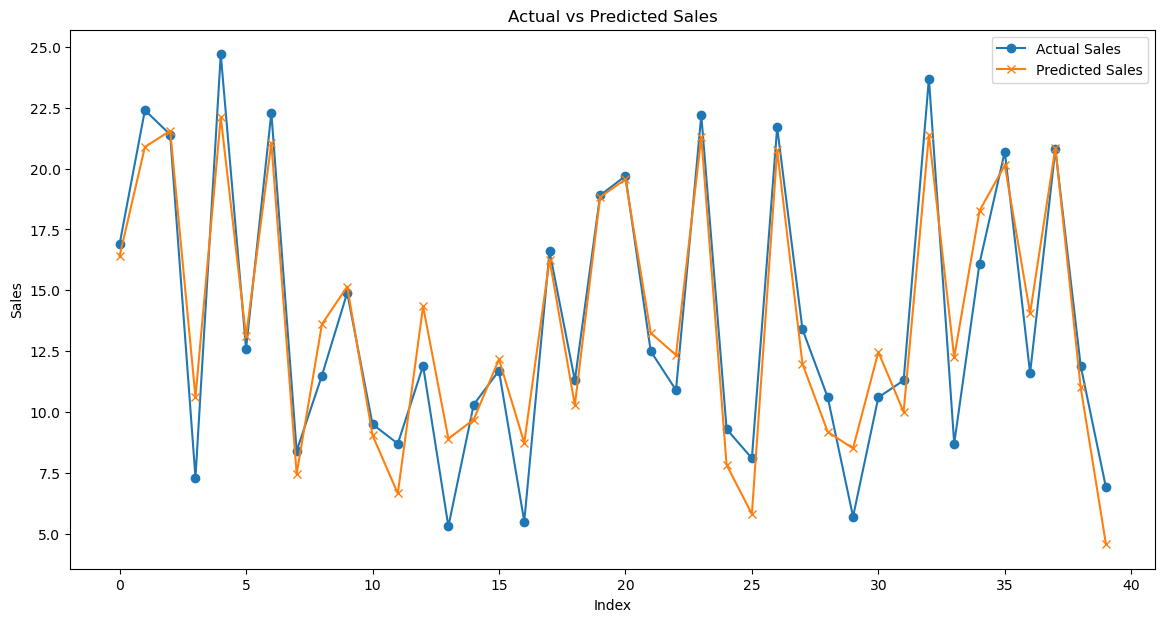

In [116]:
# Visualize the actual vs predicted sales using a line chart
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test.values, label='Actual Sales', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Sales', marker='x')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [117]:
# Display model coefficients for understanding the impact of each advertising method
coefficients = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Coefficient': model.coef_
})
coefficients

,Feature,Coefficient
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


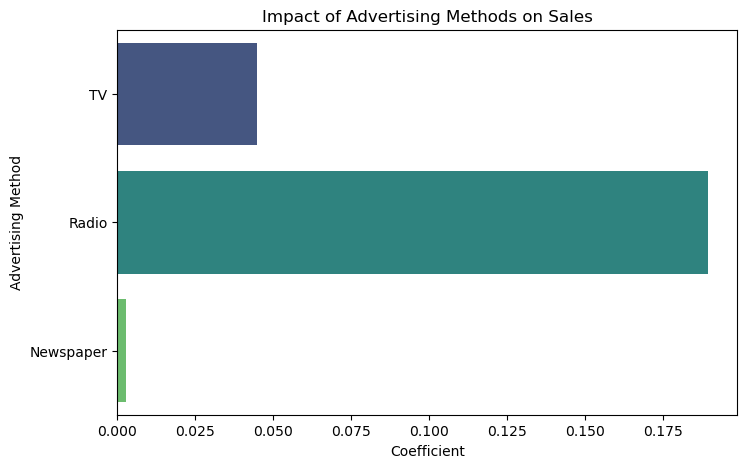

In [118]:
# Plotting the coefficients
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Impact of Advertising Methods on Sales')
plt.xlabel('Coefficient')
plt.ylabel('Advertising Method')
plt.show()